# **Recurrent Neural Network**

importing required libraries

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

setting max rows and max columns in pandas

In [53]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

importing the dataset

In [54]:
dataset=pd.read_csv('Google_Stock_Price_Train.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


making training set

In [4]:
training_set=dataset.iloc[:,1:2].values

Feature scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range(0,1))
training_set_scaled=sc.fit_transform(training_set)

NameError: ignored

here we used normalization instead of standardization cause we want values to be in between 0 to 1(RNN recommended)

Creating a data structure with 60 timesteps and 1 output

In [56]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

creating x_train from 60 time stamp i.e we are starting from 59th row and appending previous 60 values from there to form a data structure

y_train has 60th row value which is to be predicted from using previous 60 days stock prices

we are changing data type of x_train and y_train cause keras only accept numpy arrays as input

Reshaping the trainset

In [57]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

here the input is reshaped into 3 dimensions i.e we are inputting 60 time stamps(stacks of 60 values at once) values into rnn once to predict 61 day stock price

importing tensorflow and keras

In [58]:
import tensorflow.keras as tf

Initializing the rnn

In [59]:
r=tf.models.Sequential()

Adding first LSTM layer and some dropout

In [60]:
r.add(tf.layers.LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
r.add(tf.layers.Dropout(0.2))

adding second LSTM

In [61]:
r.add(tf.layers.LSTM(units=50,return_sequences=True))
r.add(tf.layers.Dropout(0.2))

adding third LSTM

In [62]:
r.add(tf.layers.LSTM(units=50,return_sequences=True))
r.add(tf.layers.Dropout(0.2))

adding fourth LSTM

In [63]:
r.add(tf.layers.LSTM(units=50))
r.add(tf.layers.Dropout(0.2))

adding output layer

In [64]:
r.add(tf.layers.Dense(units=1))

Since we are predicting continuous values one dense output layer is enough

compiling the rnn

In [70]:
r.compile(optimizer='RMSprop',loss='mean_squared_error')

compiling rnn with RMSprop optimizer. loss is mean squared error since it is continuous output

fitting the rnn

In [71]:
r.fit(x_train,y_train,epochs=100,batch_size=35)

Epoch 1/100
35/35 [==============================] - 4s 110ms/step - loss: 0.0037
Epoch 2/100
35/35 [==============================] - 4s 128ms/step - loss: 0.0021
Epoch 3/100
35/35 [==============================] - 4s 128ms/step - loss: 0.0026
Epoch 4/100
35/35 [==============================] - 4s 122ms/step - loss: 0.0024
Epoch 5/100
35/35 [==============================] - 4s 119ms/step - loss: 0.0022
Epoch 6/100
35/35 [==============================] - 4s 125ms/step - loss: 0.0023
Epoch 7/100
35/35 [==============================] - 4s 122ms/step - loss: 0.0021
Epoch 8/100
35/35 [==============================] - 4s 125ms/step - loss: 0.0021
Epoch 9/100
35/35 [==============================] - 4s 125ms/step - loss: 0.0021
Epoch 10/100
35/35 [==============================] - 4s 123ms/step - loss: 0.0022
Epoch 11/100
35/35 [==============================] - 4s 119ms/step - loss: 0.0023
Epoch 12/100
35/35 [==============================] - 4s 120ms/step - loss: 0.0018
Epoch 13/100


importing test set and plotting real stock price

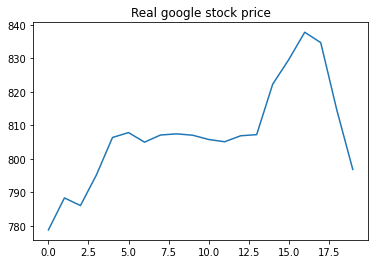

In [72]:
test_set=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=test_set.iloc[:,1:2].values
plt.plot(real_stock_price)
plt.title('Real google stock price')
plt.show()

making x_test

In [73]:
x_test=[]
dataset_total=pd.concat((dataset['Open'],test_set['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test_set)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=r.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

here x_test is prepared from google stock price test similarly as x_train is prepared and also scaled as our rnn only accepts scaled inputs 

visualizing the results

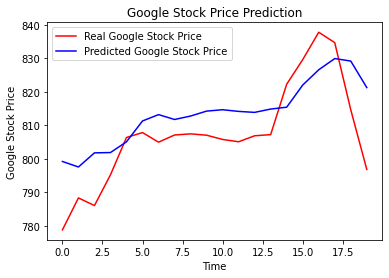

In [74]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

from above we can see that our rnn is almost accurate to the real predictions it also predicted the non linear jump